In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Import the dataset from data folder.

In [43]:
df = pd.read_csv("data/stud.csv")
df.shape

(1000, 8)

### 2. Show the first 5 records in the dataset.

In [44]:
df.head(n=5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3. Data checks to perform 
- Checking missing values.
- Checking duplicates. 
- Checking datatypes. 
- Checking the unique values of each column.
- Checking statistics of the dataset. 
- Checking various categories that are present in the categorical features.

#### 3.1 Checking missing values 

In [45]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset.

#### 3.2 Checking for duplicates. 

In [46]:
df.duplicated().sum()


np.int64(0)

There is no duplicate values within the dataset.

#### 3.3 Check for datatypes

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column.

In [48]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of the dataset

In [49]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Observations** <br>
- Means of math_score , reading_score , writing_score are almost the same.
- Standard deviation of math_score , reading_score , writing_score are almost the same.
- Minimum score in math is 0 , while in reading the minimum score in reading and writing are a bit higher (17 , 10).

#### 3.6 Exploring the data

In [50]:
### Exploring the unique value of each categorical feature 
print("Categories in gender are :" , end=" ")
print(df["gender"].unique())
print("Categories in race_ethnicity are :" , end=" ")
print(df["race_ethnicity"].unique())
print("Categories in parental_level_of_education" , end=" ")
print(df["parental_level_of_education"].unique())
print("Categories in lunch are :" , end=" ")
print(df["lunch"].unique())
print("Categories in test_preparation_course are :" , end=" ")
print(df["test_preparation_course"].unique())

Categories in gender are : ['female' 'male']
Categories in race_ethnicity are : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are : ['standard' 'free/reduced']
Categories in test_preparation_course are : ['none' 'completed']


In [51]:
### Define numerical & categorical features 
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print(f"Number of numerical features in the dataset is : {len(num_features)}")
cat_features = [feature for feature in df.columns if feature not in num_features]
print(f"Number of categorical features in the dataset is : {len(cat_features)}")

Number of numerical features in the dataset is : 3
Number of categorical features in the dataset is : 5


In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3.7 Adding "Total" and "Average" Columns.

In [53]:
df["Total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average"] = df["Total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [54]:
### Let's check for student that have the full mark in each field 
reading_full_mark = df[df["reading_score"] == 100]["Average"].count()
writing_full_mark = df[df["writing_score"] == 100]["Average"].count()
math_full_mark = df[df["math_score"] == 100]["Average"].count()

print(f"Number of students with full mark in reading : {reading_full_mark} student.")
print(f"Number of students with full mark i writing : {writing_full_mark} students.")
print(f"Number of students with full mark in math : {math_full_mark} student")

Number of students with full mark in reading : 17 student.
Number of students with full mark i writing : 14 students.
Number of students with full mark in math : 7 student


In [55]:
reading_full_mark = df[df["reading_score"] <= 20]["Average"].count()
writing_full_mark = df[df["writing_score"] <= 20]["Average"].count()
math_full_mark = df[df["math_score"] <= 20]["Average"].count()

print(f"Number of students with less than 20 in reading : {reading_full_mark} student.")
print(f"Number of students with less than 20 in writing : {writing_full_mark} students.")
print(f"Number of students with less than 20 in math : {math_full_mark} student")

Number of students with less than 20 in reading : 1 student.
Number of students with less than 20 in writing : 3 students.
Number of students with less than 20 in math : 4 student


**Insights** <br>
- We notice that the worst performance is in the math exam. 
- Best marks are in reading exam. 

### 4. Exploring the data (Visualization)

#### 4.1 Visualize the average distribution and make some conclusion 
- Using histograms.
- Using KDE (Kernel Density Estimator)

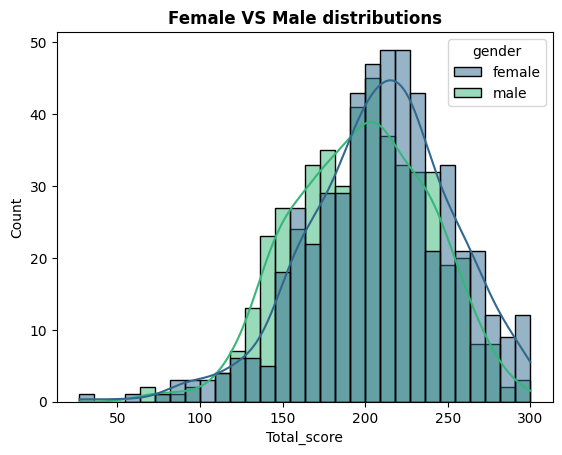

In [56]:
sns.histplot(data=df , x="Total_score" , hue="gender" , kde=True , palette="viridis" , bins=30)
plt.title("Female VS Male distributions" , weight="bold")
plt.show()

**Insights** <br> 
From the Histogram above , we come out with conclusion : 
- Performance of females are higher than male.

#### 4.2 Visualize the average distribution based on lunch

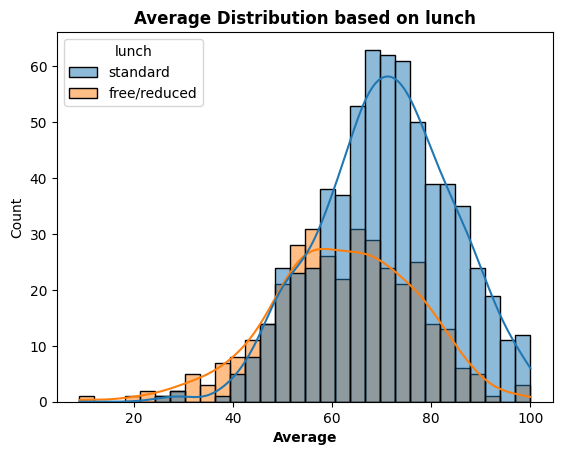

In [57]:
sns.histplot(data=df , x="Average" , hue="lunch" , bins=30 , kde=True)
plt.xlabel("Average" , weight="bold")
plt.title("Average Distribution based on lunch" , weight="bold")
plt.show()

**Insights** <br> 
- Students with standard option are performed very well comparing to free/reduced option.

#### 4.2 Visualize all numerical features distribution

In [58]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average'],
      dtype='object')

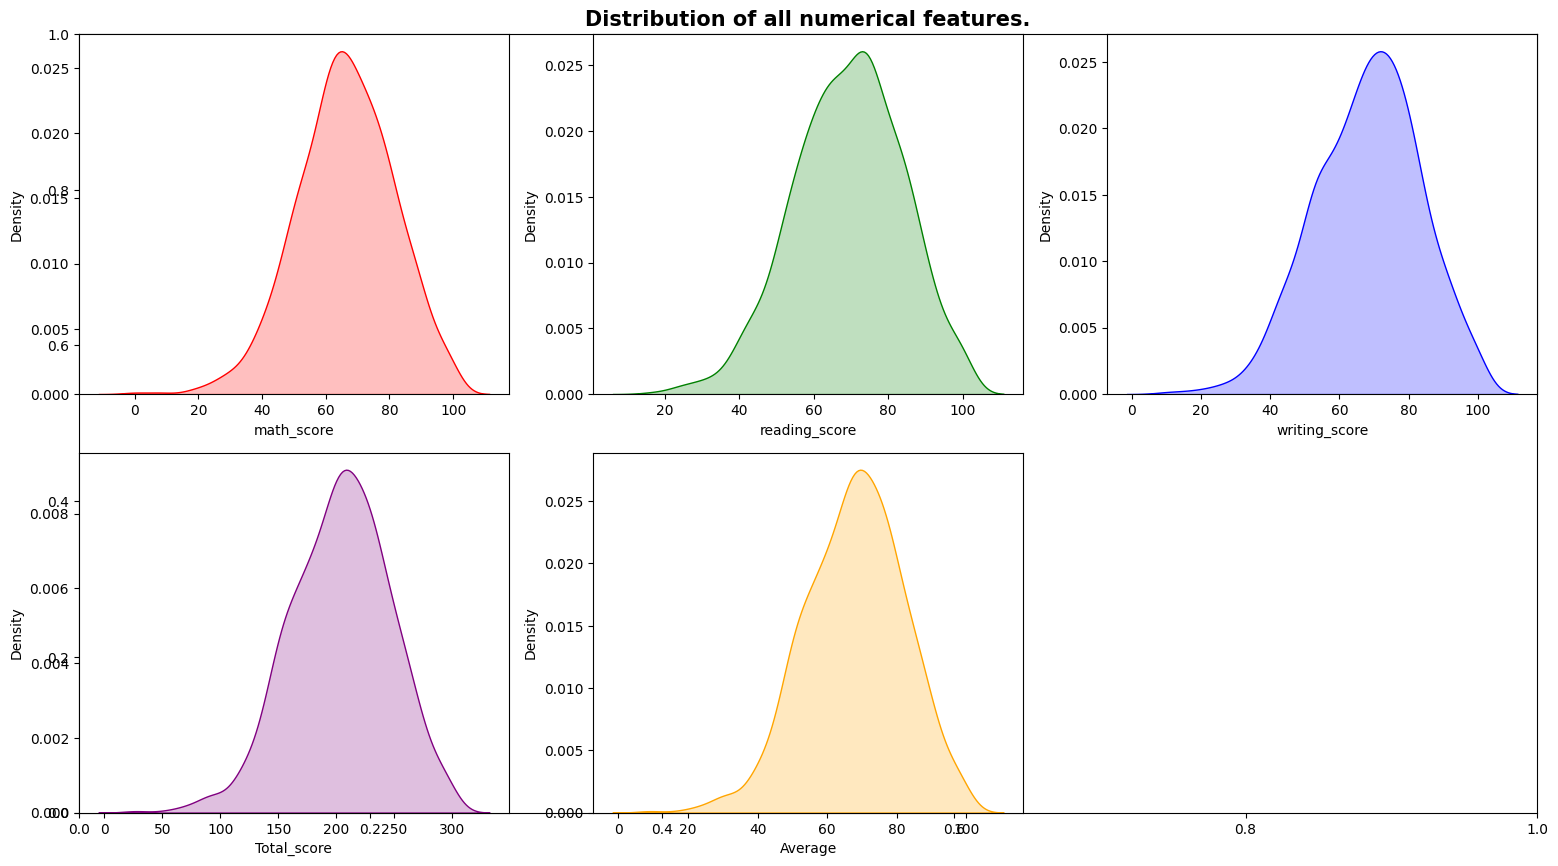

In [60]:
cols = df.select_dtypes(exclude="object")
colors = ["r" , "g" , "b" , "purple" , "orange"]
plt.figure(figsize=(16,9))
plt.title("Distribution of all numerical features." , weight="bold" , fontsize=15)
for i , col in enumerate(cols) :
    plt.subplot(2 , 3 , i + 1)
    sns.kdeplot(data=df , x=col , fill=True , color=colors[i])
plt.tight_layout()
plt.show()
    

**Insights** <br>
- From the graphs above , we notice that all numerical features follows a gaussian distribution with a bit of skewness (less outliers)

#### 4.3 Visualize outliers with the help of box plots

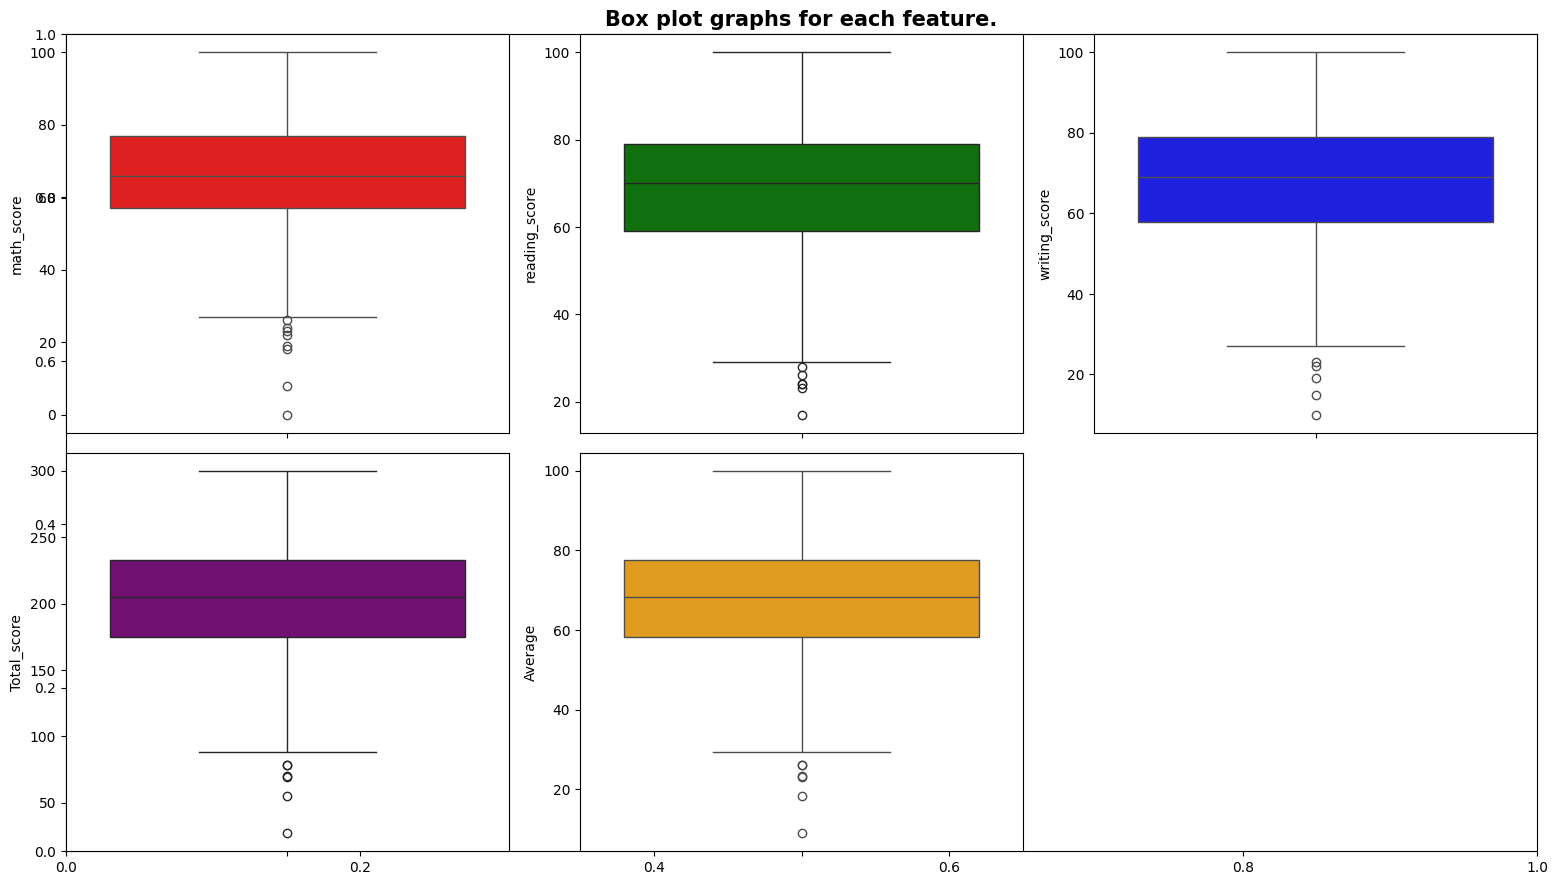

In [36]:
plt.figure(figsize=(16 , 9))
cols = df.select_dtypes(exclude="object")
plt.title("Box plot graphs for each feature." , fontsize=15 , weight="bold")
for i , col in enumerate(cols) :
    plt.subplot(2 , 3 , i + 1)
    sns.boxplot(data=df , y=col , color=colors[i])
plt.tight_layout()
plt.show()

**Insights** <br>
- All numerical features has a small amount of outliers.
- All features mean are close to each other according to the boxplots above.

#### 4.4 Visualize the relationship between features (Correlation) 

<Axes: >

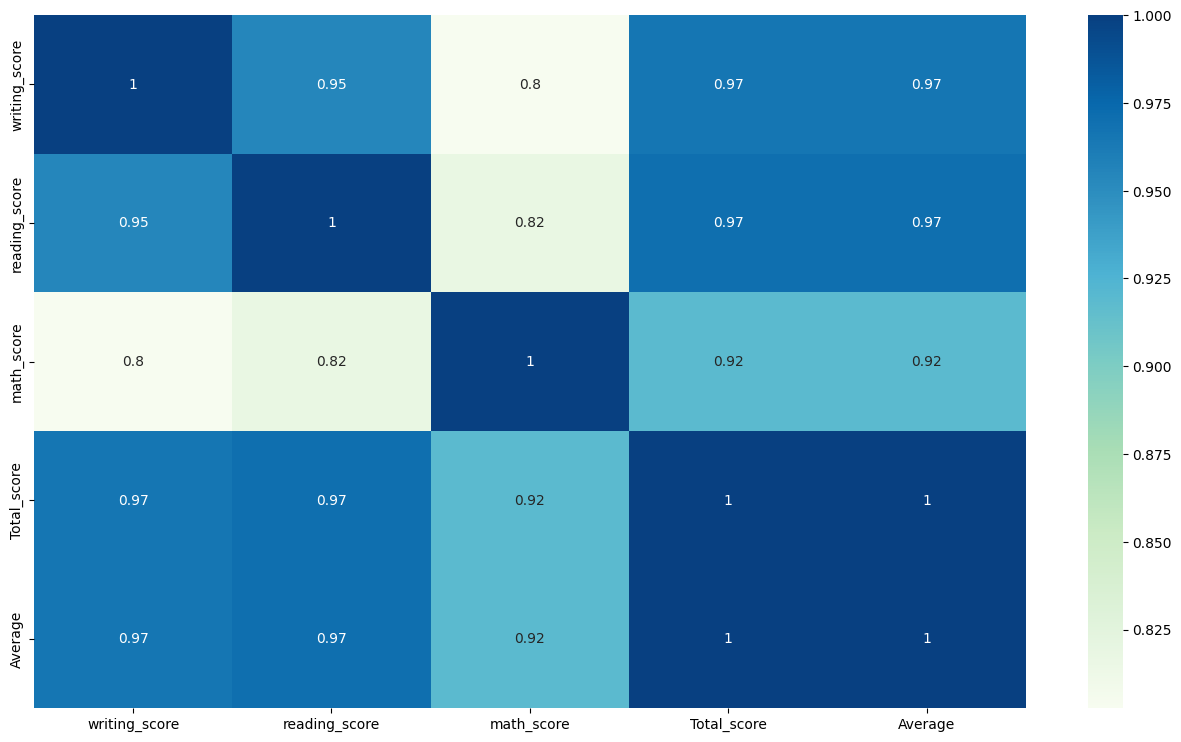

In [71]:
plt.figure(figsize=(16,9))
sns.heatmap(df[["writing_score" , "reading_score" , "math_score" , "Total_score" , "Average"]].corr() , annot=True , cmap="GnBu")

**Insights** <br> 
- According to the heatmap above , we notice that all feature are **highly correlated**.

#### Visualize all relationships between features.

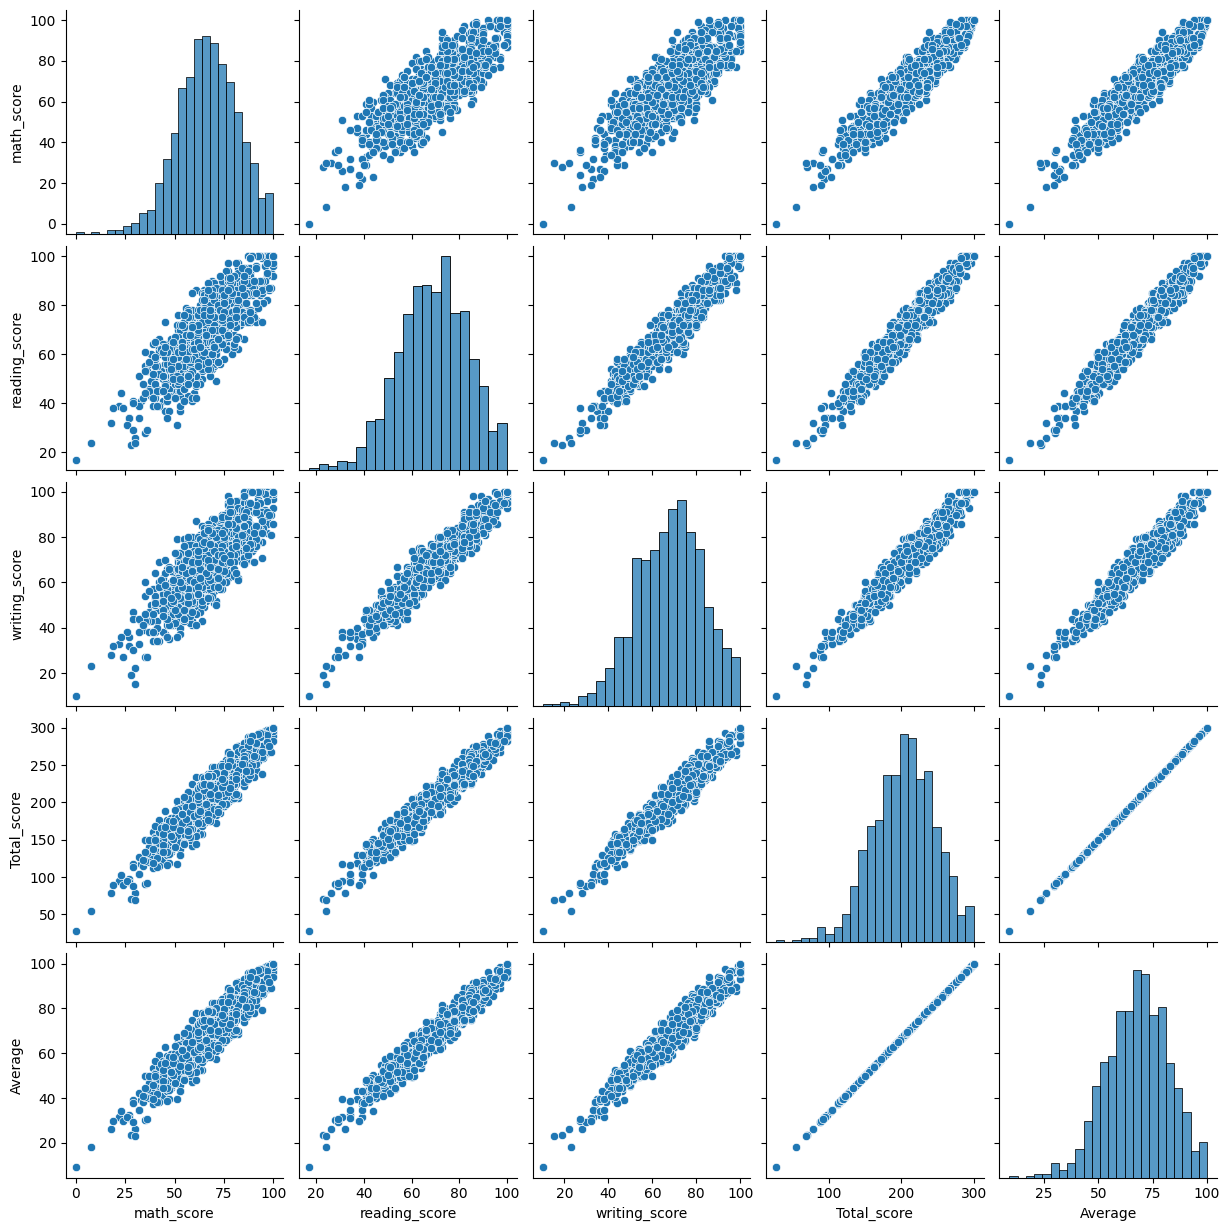

In [70]:
sns.pairplot(data=df , palette="GnBu")